<a href="https://colab.research.google.com/github/prajwal-ky22/Data-Science-Algorithms/blob/main/Big_mart_Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import numpy as np
import pandas as pd

In [172]:
train = pd.read_csv('https://raw.githubusercontent.com/prajwal-ky22/Data-Science-Algorithms/main/Big%20Mart%20Sales%20Prediction/train_v9rqX0R.csv')

In [173]:
test = pd.read_csv('https://raw.githubusercontent.com/prajwal-ky22/Data-Science-Algorithms/main/Big%20Mart%20Sales%20Prediction/test_AbJTz2l.csv')

In [174]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [175]:
train.shape

(8523, 12)

In [176]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [178]:
train['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
train['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
train['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [179]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [180]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [181]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [182]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [183]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [184]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [185]:
train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform('median'), inplace = True)

In [186]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [187]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [188]:
train[train['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [189]:
train.loc[train['Item_Identifier'] == "FDN52"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


In [190]:
train.loc[train['Item_Identifier'] == "FDK57"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.044,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.228


In [191]:
train.loc[train['Item_Identifier'] == "FDE52"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046


In [192]:
train.loc[train['Item_Identifier'] == "FDQ60"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [193]:
train['Item_Weight'].fillna(train.groupby('Item_Type')['Item_Weight'].transform('median'), inplace = True)

In [194]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [195]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [196]:
test['Item_Weight'].fillna(test.groupby('Item_Identifier')['Item_Weight'].transform('median'), inplace = True)

In [197]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                    20
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [198]:
test['Item_Weight'].fillna(test.groupby('Item_Type')['Item_Weight'].transform('median'), inplace = True)

In [199]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

In [200]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [201]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [202]:
test['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
test['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
test['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [203]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [204]:
test['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [205]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [206]:
test['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [207]:
test['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [208]:
test['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [209]:
import seaborn as sns               
import matplotlib.pyplot as plt   
%matplotlib inline

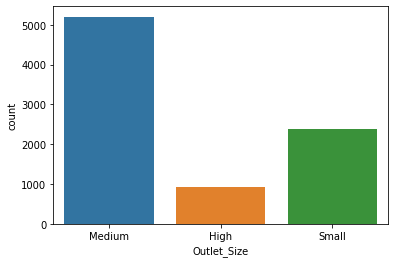

In [210]:
sns.countplot(x='Outlet_Size' , data=train)
#Majority of the outlets are medium sized

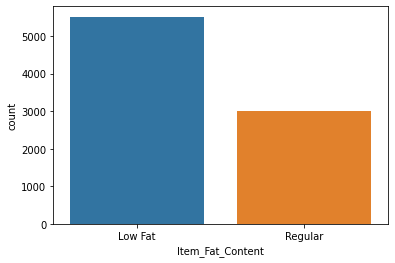

In [211]:
sns.countplot(x='Item_Fat_Content' , data=train)


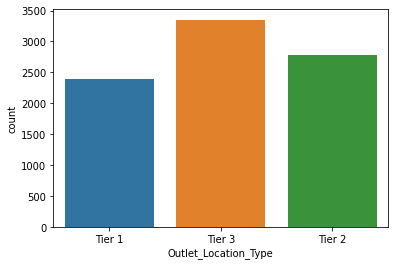

In [212]:
sns.countplot(x='Outlet_Location_Type' , data=train)

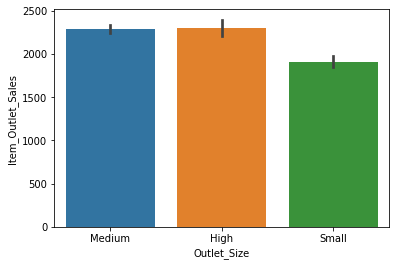

In [213]:
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train)

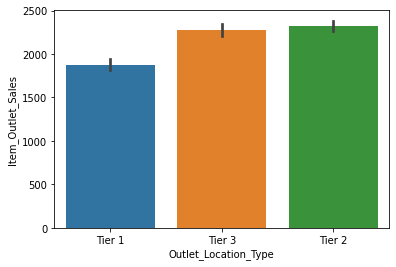

In [214]:
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train)

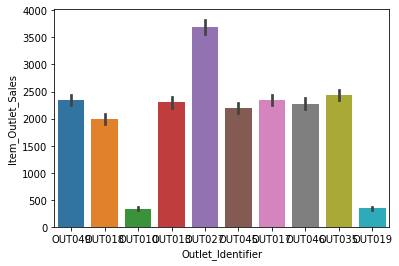

In [215]:
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train)

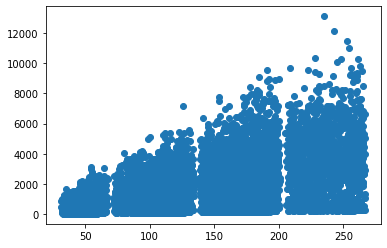

In [216]:
 plt.scatter(x='Item_MRP', y='Item_Outlet_Sales', data=train)

In [217]:
#Majority of the outlets are medium sized
#Low fat items are most sold
#Maximum outlets are in Tier 3 cities
#sales of mediumn and high size outlets are almost equal.
#sales in tier 2 and 3 are almost equal.
#Items with higher MRP contribute to maximum sales

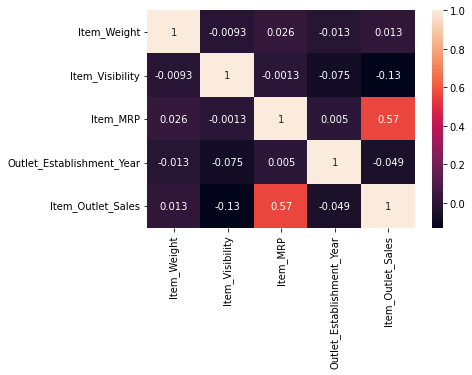

In [218]:
sns.heatmap(train.corr(),annot=True)

In [219]:
from sklearn.preprocessing import LabelEncoder

In [220]:
le = LabelEncoder()

In [221]:
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])
    
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052


In [222]:
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
train = pd.get_dummies(train, columns=['Item_Type','Outlet_Type'])
test = pd.get_dummies(test, columns=['Item_Type','Outlet_Type'])

In [223]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1999,1,0,3735.1380,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,1,0.019278,48.2692,OUT018,2009,1,2,443.4228,...,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1999,1,0,2097.2700,...,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,1,0.000000,182.0950,OUT010,1998,1,2,732.3800,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,0,0.000000,53.8614,OUT013,1987,0,2,994.7052,...,0,0,0,0,0,0,0,1,0,0


In [224]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750,0,0.007565,107.8622,OUT049,1999,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,FDW14,8.300,1,0.038428,87.3198,OUT017,2007,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,NCN55,14.600,0,0.099575,241.7538,OUT010,1998,1,2,0,...,0,1,0,0,0,0,1,0,0,0
3,FDQ58,7.315,0,0.015388,155.0340,OUT017,2007,1,1,0,...,0,0,0,1,0,0,0,1,0,0
4,FDY38,13.600,1,0.118599,234.2300,OUT027,1985,1,2,0,...,0,0,0,0,0,0,0,0,0,1


In [225]:
# Dropping irrelevant columns
train  = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test = test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [226]:
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression


In [227]:
Y = train['Item_Outlet_Sales']
X = train.drop('Item_Outlet_Sales', axis = 1)

In [228]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 1)

In [229]:
LR = LinearRegression(normalize=True)

In [230]:
LR.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [231]:
Y_predict = LR.predict(X_test)

In [232]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [233]:
mean_squared_error(Y_test, Y_predict)

1271067.2024220761

In [234]:
mean_absolute_error(Y_test, Y_predict)

836.0369108080363

In [235]:
r2_score(Y_test, Y_predict)

0.5599467316155473

In [236]:
Y_predict_final = LR.predict(test)

In [237]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0,0.007565,107.8622,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,8.300,1,0.038428,87.3198,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,14.600,0,0.099575,241.7538,1,2,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,7.315,0,0.015388,155.0340,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,13.600,1,0.118599,234.2300,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [238]:
Y_predict_final


array([1816., 1488., 1880., ..., 1872., 3528., 1280.])

In [239]:
Y_predict_final= pd.DataFrame(Y_predict_final,columns=['Sales predicted'])

In [240]:
Y_predict_final.head()

,Sales predicted
0,1816.0
1,1488.0
2,1880.0
3,2504.0
4,5232.0


In [241]:
test['Sales predicted'] = Y_predict_final['Sales predicted'].values

In [242]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Sales predicted
0,20.750,0,0.007565,107.8622,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1816.0
1,8.300,1,0.038428,87.3198,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1488.0
2,14.600,0,0.099575,241.7538,1,2,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1880.0
3,7.315,0,0.015388,155.0340,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,2504.0
4,13.600,1,0.118599,234.2300,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5232.0


In [243]:
test1 = pd.read_csv('https://raw.githubusercontent.com/prajwal-ky22/Data-Science-Algorithms/main/Big%20Mart%20Sales%20Prediction/test_AbJTz2l.csv')

In [244]:
Submission_file = test1[['Item_Identifier','Outlet_Identifier']]

In [245]:
Submission_file.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [246]:
Submission_file['Item_Outlet_Sales'] = Y_predict_final['Sales predicted'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [247]:
Submission_file.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1816.0
1,FDW14,OUT017,1488.0
2,NCN55,OUT010,1880.0
3,FDQ58,OUT017,2504.0
4,FDY38,OUT027,5232.0


In [248]:
from google.colab import files
Submission_file.to_csv('Submission file.csv',index=False)
files.download('Submission file.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>